<a href="https://colab.research.google.com/github/TomBeagley/MEng-FYP/blob/main/3D_CNN_Iteration_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

!pip install wandb -qU
import wandb
wandb.login() # API key: c8775ed5a47cb717d327538be19f198f1e1b3872

from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 1.1 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Import all training and validation data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Create Training data set (images and labels) (all pre-processed in "pre-processing" notebook)

In [ ]:
#file_path = r"C:\Users\tombe\OneDrive - University of Bath\Documents\YEAR 4\FYP\Semester 2\Data\labelled data\labelsTr"
#os.chdir(file_path)
os.chdir("/content/gdrive/My Drive/FYP Data/labelled data/labelsTr")

all_files = os.listdir()
#print(all_files)
#print()

# get all nifti files (images)
nii_files = filter(lambda x: x[-4:] == '.nii', all_files)
nii_files = list(nii_files)
nii_files = sorted(nii_files)
print(nii_files)
print()

# get all csv files (labels)
csv_files = filter(lambda x: x[-4:] == '.csv', all_files)
csv_files = list(csv_files)
csv_files = sorted(csv_files)
print(csv_files)

train_images = list()
train_labels = list()


# read-in each image and its data
for item in nii_files:
    file_name = item
    image = nib.load(file_name)
    image_data = image.get_fdata()
    train_images.append(image_data)

# read-in each data frame of labels
for item in csv_files:
    file_name = item
    df = pd.read_csv(file_name)
    train_labels.append(df)

['S02.nii', 'S03.nii', 'S04.nii', 'S08.nii', 'S09.nii', 'S10.nii', 'S11.nii', 'S14.nii', 'S15.nii', 'S16.nii', 'S18.nii', 'S19.nii', 'S26.nii', 'S27.nii', 'S28.nii', 'S30.nii', 'S31.nii', 'S33.nii', 'S35.nii', 'S36.nii', 'S37.nii', 'S38.nii', 'S40.nii', 'S42.nii', 'S43.nii', 'S45.nii', 'S46.nii']

['S02_labels.csv', 'S03_labels.csv', 'S04_labels.csv', 'S08_labels.csv', 'S09_labels.csv', 'S10_labels.csv', 'S11_labels.csv', 'S14_labels.csv', 'S15_labels.csv', 'S16_labels.csv', 'S18_labels.csv', 'S19_labels.csv', 'S26_labels.csv', 'S27_labels.csv', 'S28_labels.csv', 'S30_labels.csv', 'S31_labels.csv', 'S33_labels.csv', 'S35_labels.csv', 'S36_labels.csv', 'S37_labels.csv', 'S38_labels.csv', 'S40_labels.csv', 'S42_labels.csv', 'S43_labels.csv', 'S45_labels.csv', 'S46_labels.csv']


Sample label from training dataset

In [ ]:
train_labels[0]

,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,49,69,31,66,50,37,78,85,35


### Create Validation data set (images and labels) (all pre-processed in "pre-processing" notebook)

In [ ]:
#file_path = r"C:\Users\tombe\OneDrive - University of Bath\Documents\YEAR 4\FYP\Semester 2\Data\labelled data\labelsVa"
#os.chdir(file_path)
os.chdir("/content/gdrive/My Drive/FYP Data/labelled data/labelsVa")

all_files = os.listdir()
#print(all_files)
#print()

# get all nifti files (images)
nii_files = filter(lambda x: x[-4:] == '.nii', all_files)
nii_files = list(nii_files)
nii_files = sorted(nii_files)
print(nii_files)
print()

# get all csv files (labels)
csv_files = filter(lambda x: x[-4:] == '.csv', all_files)
csv_files = list(csv_files)
csv_files = sorted(csv_files)
print(csv_files)

validation_images = list()
validation_labels = list()


# read-in each image and its data
for item in nii_files:
    file_name = item
    image = nib.load(file_name)
    image_data = image.get_fdata()
    validation_images.append(image_data)

# read-in each data frame of labels
for item in csv_files:
    file_name = item
    df = pd.read_csv(file_name)
    validation_labels.append(df)

['S01.nii', 'S05.nii', 'S13.nii', 'S17.nii', 'S32.nii', 'S34.nii', 'S41.nii', 'S44.nii']

['S01_labels.csv', 'S05_labels.csv', 'S13_labels.csv', 'S17_labels.csv', 'S32_labels.csv', 'S34_labels.csv', 'S41_labels.csv', 'S44_labels.csv']


In [ ]:
validation_labels[0]

,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,40,69,32,62,48,36,66,81,37


### View data before putting into model

In [ ]:
#print(train_images)
#print(train_labels)

#print(validation_images)
#print(validation_labels)

#print(test_images)
#print(test_labels)

In [ ]:
train_images = tf.stack(train_images)
train_labels = np.array(train_labels)
train_labels = tf.stack(train_labels)

validation_images = tf.stack(validation_images)
validation_labels = np.array(validation_labels)
validation_labels = tf.stack(validation_labels)

#test_images = tf.stack(test_images)
#test_labels = tf.stack(test_labels)

print(train_images.get_shape())
print(train_labels.get_shape())

print(validation_images.get_shape())
print(validation_labels.get_shape())

(27, 128, 128, 64)
(27, 1, 9)
(8, 128, 128, 64)
(8, 1, 9)


In [ ]:
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

# ref - https://medium.com/geekculture/how-to-plot-model-loss-while-training-in-tensorflow-9fa1a1875a5 

In [ ]:
# Start a run, tracking hyperparameters
wandb.init(
    # set the wandb project where this run will be logged
    project="FYP 3D CNN v17"
    )

wandb: Currently logged in as: thhb20 (fyp_masters). Use `wandb login --relogin` to force relogin


### 3D CNN Model
CHANGES FROM PREVIOUS VERSION:

- gone back to similar architecture to v14 as v15 suffered from overfitting. Swapped a maxpool and conv layer on third block around though for a more satisfying pattern
- changed dropout from 0.2 to 0.5 to 0.6 to 0.75 (was still overfitting at 0.5 & 0.6)

In [ ]:
# Define the input shape
input_shape = (27, 128, 128, 64, 1)

# Define the model architecture
model = keras.Sequential(
    [
        # First convolutional layer
        layers.Conv3D(32, kernel_size=(3, 3, 3), padding ='Same', activation="relu", input_shape=input_shape[1:]),
        layers.MaxPooling3D(pool_size=(2, 2, 2)),
        #layers.Conv3D(32, kernel_size=(3, 3, 3), padding ='Same', activation="relu"), # this one
        #layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv3D(64, kernel_size=(3, 3, 3), padding ='Same', activation="relu", kernel_regularizer =tf.keras.regularizers.L1L2(l1=0.05, l2=0.05)),
        layers.MaxPooling3D(pool_size=(2, 2, 2)),
        #layers.Conv3D(64, kernel_size=(3, 3, 3), padding ='Same', activation="relu", kernel_regularizer =tf.keras.regularizers.l2(l=0.01)),
        #layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv3D(128, kernel_size=(3, 3, 3), padding ='Same', activation="relu", kernel_regularizer =tf.keras.regularizers.L1L2(l1=0.05, l2=0.05)),
        #layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.Conv3D(128, kernel_size=(3, 3, 3), padding ='Same', activation="relu", kernel_regularizer =tf.keras.regularizers.l2(l=0.01)), #this one
        layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.BatchNormalization(),

        # Fourth convolutional layer
        layers.Conv3D(256, kernel_size=(3, 3, 3), padding ='Same', activation="relu", kernel_regularizer =tf.keras.regularizers.L1L2(l1=0.05, l2=0.05)),
        #layers.MaxPooling3D(pool_size=(2, 2, 2)), # and this one
        layers.Conv3D(256, kernel_size=(3, 3, 3), padding ='Same', activation="relu", kernel_regularizer =tf.keras.regularizers.L1L2(l1=0.05, l2=0.05)),
        layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.BatchNormalization(),

        # Flatten the output of the convolutional layers
        layers.Flatten(),

        # First dense layer
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.75),

        # Second dense layer
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.75),
     
        # Third dense layer
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.75),

        # Output layer with 9 nodes for the x, y, and z coordinates of each of the 3 pulmonary artery endpoints
        layers.Dense(9, activation="linear"),
    ]
)

In [ ]:
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Compile the model with the appropriate loss function and optimizer
model.compile(
    #loss="mean_squared_error",
    loss="mean_absolute_error",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["mean_absolute_error", "mean_squared_error", tf.keras.metrics.RootMeanSquaredError()],
)

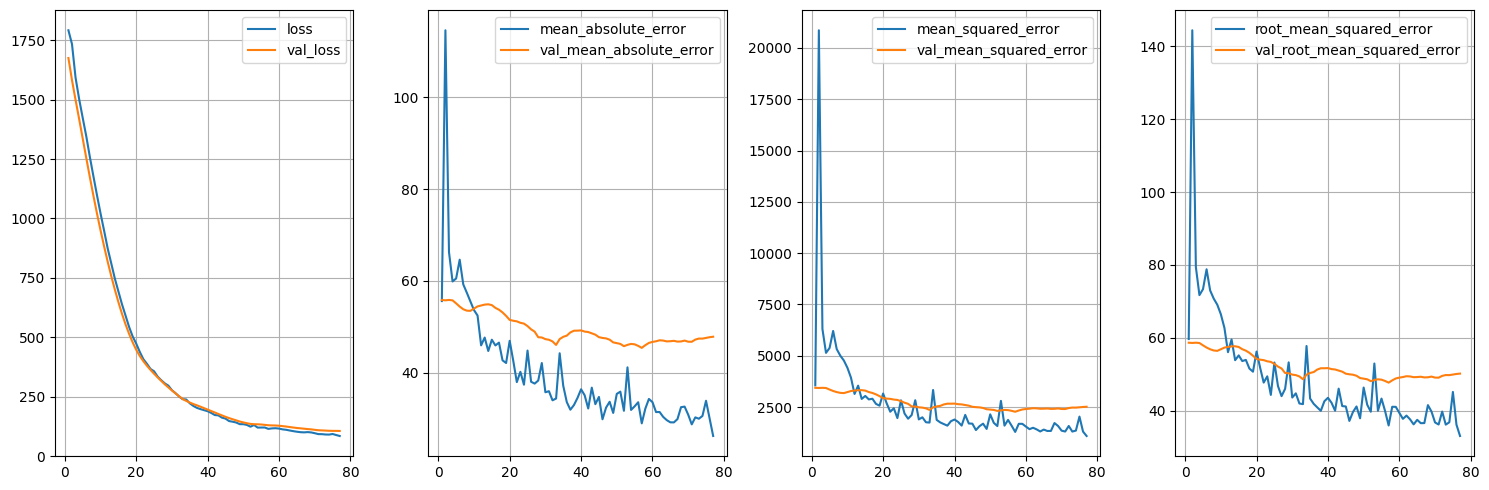

wandb: Adding directory to artifact (./models)... Done. 3.4s


1/1 [==============================] - 322s 322s/step - loss: 84.4437 - mean_absolute_error: 26.2375 - mean_squared_error: 1089.1613 - root_mean_squared_error: 33.0024 - val_loss: 105.6612 - val_mean_absolute_error: 47.8536 - val_mean_squared_error: 2513.6345 - val_root_mean_squared_error: 50.1362
Epoch 78/100


In [ ]:
callbacks_list = [PlotLearning(), WandbMetricsLogger(log_freq="epoch"), WandbModelCheckpoint("models")]

# Train the model
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels),
                    callbacks=callbacks_list)

# Finish the wandb run
wandb.finish()

In [ ]:
# Test data
# Xnew = 

# Use model to make predictions
#ynew = model.predict(Xnew)

# show the inputs and predicted outputs
#for i in range(len(Xnew)):
# print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

#### Snippets of code that have been tried/taken out/might be useful in future from above model
-----

##### #Compile model.
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

-----

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

-----

ax[0].plot(history.history['accuracy'], label='accuracy')
ax[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim()
ax[0].legend(loc='lower right')

-----





In [ ]:
# Evaluate model
fig, ax = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)

ax[0].plot(history.history['mean_absolute_error'], label='mean_absolute_error')
ax[0].plot(history.history['val_mean_absolute_error'], label = 'val_mean_absolute_error')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_ylim()
ax[0].legend(loc='lower right')

ax[1].plot(history.history['mean_squared_error'], label='mean_squared_error')
ax[1].plot(history.history['val_mean_squared_error'], label = 'val_mean_squared_error')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_ylim()
ax[1].legend(loc='lower right')

ax[2].plot(history.history['root_mean_squared_error'], label='root_mean_squared_error')
ax[2].plot(history.history['val_root_mean_squared_error'], label = 'val_root_mean_squared_error')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Root Mean Squared Error')
ax[2].set_ylim()
ax[2].legend(loc='lower right')

ax[3].plot(history.history['loss'], label='loss')
ax[3].plot(history.history['val_loss'], label = 'val_loss')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Loss')
ax[3].set_ylim()
ax[3].legend(loc='lower right')

In [ ]:
# Print the summary of the model architecture
model.summary()

In [ ]:
!pip install visualkeras
import visualkeras

visualkeras.layered_view(model, legend=True).show() # display using your system viewer

#visualkeras.layered_view(model, to_file='output.png') # write to disk
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

In [ ]:
#font = ImageFont.truetype("arial.ttf", 14)
#visualkeras.layered_view(model, legend=True, font=font).show()

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#toolbar-add-code").click() 
}setInterval(ClickConnect,300000)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True

In [ ]:
#!pip install pillow
#from PIL import ImageFont

#font = ImageFont.truetype(size=14)
#visualkeras.layered_view(model, legend=True, font=font).show()